In [1]:
%autocall 2

Automatic calling is: Full


In [58]:
from importlib import reload

import numpy as np

import time, pprint

import librosa, xmltodict, io, audiotsm, sounddevice

from skimage import exposure

from scipy import ndimage

import os

import gc

In [58] used 0.0234 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 1746.62 MiB


In [402]:
from ipywidgets import interact, interactive, FloatSlider, IntSlider, Layout, HBox, VBox

from ipywidgets import Audio as audiowidget

In [402] used 2.8203 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 2191.08 MiB


In [3]:
%matplotlib ipympl

In [173]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.widgets import Cursor, MultiCursor

In [173] used -12.9492 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 7992.86 MiB


In [5]:
print(mpl.get_backend())
print(plt.isinteractive())
print(mpl.is_interactive())

mpl.interactive(False)
plt.ioff()

print(mpl.is_interactive())
print(plt.isinteractive())

mpl.rcParams['figure.figsize']

module://ipympl.backend_nbagg
True
True
False
False


[6.4, 4.8]

In [6]:
import matplotlib.style as mplstyle
print(mplstyle.available)

# mplstyle.use('classic')
mplstyle.use('fast')

mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 1.0

mpl.rcParams['agg.path.chunksize'] = 10000

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [23]:
import sys

mylibrarypaths = ["C:/Users/m142519/python", "H:/python"]

for p in mylibrarypaths:
    if os.path.isdir(p):
        if p not in sys.path:
            sys.path.append(p)

pprint.pprint(sys.path)

['C:\\Users\\m142519\\Desktop\\Jupyter Notebooks',
 'c:\\Users\\m142519\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'c:\\Users\\m142519\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'c:\\Users\\m142519\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'c:\\Users\\m142519\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'c:\\Users\\m142519\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'c:\\Users\\m142519\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'c:\\Users\\m142519\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\m142519\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin',
 'H:/python',
 'C:/Users/m142519/python']
In [23] used 0.0078 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 121.29 MiB


In [9]:
import ipython_memory_usage

In [10]:
%ipython_memory_usage_start

'memory profile enabled'

In [10] used 0.0039 MiB RAM in 16.82s, peaked 0.00 MiB above current, total RAM usage 103.65 MiB


In [32]:
import pyMRAW as photron
photron = reload(photron)

In [32] used 0.2422 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 124.75 MiB


In [33]:
pwd

'C:\\Users\\m142519\\Desktop\\JN_SOVTE\\JN_Experiment01_Cross\\HSV_20230818_133111'

In [33] used -0.0039 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 124.74 MiB


In [12]:
cd "C:\Users\m142519\Desktop\JN_SOVTE\JN_Experiment01_Cross\HSV_20230818_133111"

C:\Users\m142519\Desktop\JN_SOVTE\JN_Experiment01_Cross\HSV_20230818_133111
In [12] used 0.0039 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 103.68 MiB


In [390]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8C22-592F

 Directory of C:\Users\m142519\Desktop\JN_SOVTE\JN_Experiment01_Cross\HSV_20230818_133111

08/21/2023  12:45 PM    <DIR>          .
08/21/2023  12:45 PM    <DIR>          ..
08/18/2023  01:40 PM         1,233,980 HSV_20230818_133111.cihx
08/18/2023  01:40 PM    47,303,411,712 HSV_20230818_133111.mraw
               2 File(s) 47,304,645,692 bytes
               2 Dir(s)  529,400,889,344 bytes free
In [390] used 0.0625 MiB RAM in 0.16s, peaked 0.00 MiB above current, total RAM usage 479.31 MiB


In [14]:
camerafile = "HSV_20230818_133111.cihx"

In [14] used 0.0039 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 103.72 MiB


In [34]:
cih = photron.get_cih(camerafile)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 300: character maps to <undefined>

In [34] used 0.1172 MiB RAM in 0.15s, peaked 0.00 MiB above current, total RAM usage 124.86 MiB


In [35]:
f = open(camerafile, 'rb')

a = f.read()

f.close()

cihstart = a.find(b'<cih>')

cihend = a.find(b'</cih>') + 6

In [35] used 1.1797 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 126.04 MiB


In [36]:
cih = xmltodict.parse(a[cihstart:cihend], dict_constructor = dict)['cih']

In [36] used 0.0352 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 126.07 MiB


In [37]:
fileformat = cih['imageFileInfo']['fileFormat']
colorbit = int(cih['imageDataInfo']['colorInfo']['bit'])
effectivebitdepth = int(cih['imageDataInfo']['effectiveBit']['depth'])
ebs = cih['imageDataInfo']['effectiveBit']['side']
orgtotalframe = int(cih['frameInfo']['recordedFrame'])
totalframe = int(cih['frameInfo']['totalFrame'])

In [37] used 0.0039 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 126.08 MiB


In [38]:
print(fileformat,
      colorbit,
      effectivebitdepth,
      ebs,
      orgtotalframe,
      totalframe)

Mraw 12 12 Lower 405217 405217
In [38] used -0.0039 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 126.07 MiB


In [386]:
rawimages = photron.load_images(''.join([os.path.splitext(camerafile)[0], '.mraw']), cih = cih)

h, w, N, bitdepth, bitside, colorbit:  304 256 405217 12 Lower 12
NO rollaxis: images.shape:  (47303411712,)
In [386] used 0.0430 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 1599.59 MiB


In [387]:
print()
print("shape: ", rawimages.shape)
print("dtype: ", rawimages.dtype)

print("rawimages: ", rawimages.__repr__())

try:
    height = cih["Image Height"]
    width = cih["Image Width"]
    Nframes = cih["Total Frame"]
    fps = cih["Record Rate(fps)"]
except:
    height = int(cih['imageDataInfo']['resolution']['height'])
    width = int(cih['imageDataInfo']['resolution']['width'])
    Nframes = int(cih['frameInfo']['totalFrame'])
    fps = int(cih['recordInfo']['recordRate'])

print()
print("height: ", height)
print("width: ", width)
print("Nframes: ", Nframes)
print("fps: ", fps)


shape:  (47303411712,)
dtype:  uint8
rawimages:  memmap([ 0, 64,  0, ...,  1, 16, 31], dtype=uint8)

height:  304
width:  256
Nframes:  405217
fps:  5000
In [387] used 0.0078 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 1599.59 MiB


In [41]:
import pprint

In [41] used -0.0039 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 126.22 MiB


In [388]:
pprint.pprint(cih)

{'basicInfo': {'cameraName': 'Camera_1',
               'logoPath': 'C:/Program Files/Photron/Photron FASTCAM Viewer '
                           '4/logo/photron_white_128.png'},
 'deviceInfo': {'autoDownloadMode': '0',
                'autoExposure': '0',
                'autoExposureInfo': {'height': '16',
                                     'limit': '0',
                                     'range': '0',
                                     'value': '0',
                                     'width': '128',
                                     'xPos': '4294966912',
                                     'yPos': '4294966936'},
                'camMode': '1',
                'currentPartition': '1',
                'delayInfos': {'delayInfo': [{'signal': '1', 'value': '0'},
                                             {'signal': '2', 'value': '0'},
                                             {'signal': '3', 'value': '0'},
                                             {'signal': '4', 'va

In [43]:
import mediapy as media

In [43] used 0.1875 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 126.42 MiB


In [44]:
media.set_ffmpeg("C:\\Users\\m142519\\Programs\\ffmpeg-master-latest-win64-gpl\\bin\\ffmpeg.exe")

In [44] used -0.0039 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 126.41 MiB


In [45]:
if "C:/Users/m142519/Programs" not in sys.path:
    sys.path.append("C:/Users/m142519/Programs")

In [45] used 0.0078 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 126.42 MiB


In [46]:
def convertrawimage(rawimages, cih = cih, Nstart = 0, Nconvert = 1):
    r = rawimages

    try:
        height = np.int64(cih["Image Height"])
        width = np.int64(cih["Image Width"])
        Nframes = np.int64(cih["Total Frame"])
    except:
        height = np.int64(cih['imageDataInfo']['resolution']['height'])
        width = np.int64(cih['imageDataInfo']['resolution']['width'])
        Nframes = np.int64(cih['frameInfo']['totalFrame'])

    if Nstart < 0:
        Nstart = 0
    
    if Nstart >= Nframes:
        Nstart = Nframes - 1
        
    if Nstart + Nconvert > Nframes:
        Nconvert = Nframes - Nstart
    
    Na = np.int64(Nstart) * height * width // 2 * 3
    Nb = np.int64(Nstart + Nconvert) * height * width // 2 * 3

    t0 = time.perf_counter()
    byte01 = r[Na + 0:Nb:3].astype(np.uint16)
    t1 = time.perf_counter()
    byte02 = r[Na + 1:Nb:3].astype(np.uint16)
    t2 = time.perf_counter()
    byte03 = r[Na + 2:Nb:3].astype(np.uint16)
    t3 = time.perf_counter()

    # bitside = cih['EffectiveBit Side'].lower() # 'lower'

    # if bitside == 'lower':
    uint12_01 = np.left_shift(byte01, 4)
    t4 = time.perf_counter()
    uint12_01 += np.right_shift(byte02, 4)
    t5 = time.perf_counter()
    
    uint12_02 = byte03
    t6 = time.perf_counter()
    uint12_02 += np.left_shift(np.bitwise_and(byte02, 0x0F), 8)
    t7 = time.perf_counter()
    # else:
    #    raise NotImplementedError()

    frame = np.stack((uint12_01, uint12_02), axis = 1)
    t8 = time.perf_counter()
    
    timings = [t0, t1, t2, t3, t4, t5, t6, t7, t8]
    
    return frame.reshape((-1, height, width)), timings

In [46] used 0.0820 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 126.50 MiB


In [389]:
gc.collect()

4440

In [389] used -1120.3477 MiB RAM in 0.53s, peaked 1120.37 MiB above current, total RAM usage 479.25 MiB


In [49]:
np.seterr(all = 'raise', over = 'raise', invalid = 'raise', under = 'raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [49] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 125.33 MiB


In [50]:
# demonstrate some error with overflow of long_scalars, np.int32

Nblock = 4000

for framenum in np.arange(16000, Nframes, Nblock, dtype = np.int32):
    Nstart = framenum
    Nconvert = Nblock
    Nb = np.int32(Nstart + Nconvert) * height * width // 2 * 3

FloatingPointError: overflow encountered in scalar multiply

In [50] used 0.0352 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 125.36 MiB


In [51]:
%%timeit Nstart = np.random.randint(0, Nframes)
image, timings = convertrawimage(rawimages, Nstart = Nstart, Nconvert = 1)

181 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
In [51] used 1.8906 MiB RAM in 14.81s, peaked 0.00 MiB above current, total RAM usage 127.25 MiB


In [637]:
# %%timeit -n1 -r1
# 1.59 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

triggertimems = 9041
# triggertimems = 0

starttimems, endtimems = [26500, 27800]

starttimems, endtimems = [32500, 33700]

# starttimems, endtimems = [54904, 55770]

# starttimems, endtimems = [56317, 56796]

Nstart = fps / 1000 * (starttimems - triggertimems)
Nend = fps / 1000 * (endtimems - triggertimems)
Nconvert = Nend - Nstart

print(starttimems, Nstart)
print(endtimems, Nend)
print(Nconvert)

highspeedvideo, _ = convertrawimage(rawimages, Nstart = Nstart, Nconvert = Nconvert)

32500 117295.0
33700 123295.0
6000.0
In [637] used 1558.9688 MiB RAM in 2.16s, peaked 1781.27 MiB above current, total RAM usage 7845.65 MiB


In [638]:
gc.collect()

3386

In [638] used 0.0000 MiB RAM in 0.80s, peaked 0.00 MiB above current, total RAM usage 7845.65 MiB


In [639]:
equalize_highspeed = exposure.equalize_adapthist(highspeedvideo, 
                                                 kernel_size = width / 10, 
                                                 clip_limit = 0.05,
                                                 nbins = 256)

In [639] used 3562.5039 MiB RAM in 61.46s, peaked 12765.67 MiB above current, total RAM usage 11408.16 MiB


In [640]:
del highspeedvideo
gc.collect()

0

In [640] used -890.6055 MiB RAM in 0.76s, peaked 890.63 MiB above current, total RAM usage 10517.55 MiB


In [641]:
o = exposure.adjust_gamma(equalize_highspeed, gamma = 1 / 2.2)

In [641] used -296.8516 MiB RAM in 11.70s, peaked 7387.24 MiB above current, total RAM usage 10220.70 MiB


In [642]:
del equalize_highspeed
gc.collect()

0

In [642] used -3562.4805 MiB RAM in 0.93s, peaked 3562.50 MiB above current, total RAM usage 6658.22 MiB


import tempfile

tempvideofilename = os.path.join(tempfile.gettempdir(), 'tempvideo.mp4')

with media.VideoWriter(tempvideofilename, (height, width), codec = 'h264', fps = 30, input_format = 'gray') as writer:
    for image in highspeedvideo:
        equalize_image = exposure.equalize_adapthist(image, 
                                                 kernel_size = width / 10, 
                                                 clip_limit = 0.05,
                                                 nbins = 256)
        writer.add_image(equalize_image)

media.show_video(media.read_video(tempvideofilename))

del image, writer

In [ ]:
media.show_video(o, title = camerafile, codec = 'h264', fps = 10, height = 2 * height)

In [643]:
plt.close(fig = fig)
del fig
gc.collect()

0

In [643] used -0.0664 MiB RAM in 0.75s, peaked 0.00 MiB above current, total RAM usage 6658.15 MiB


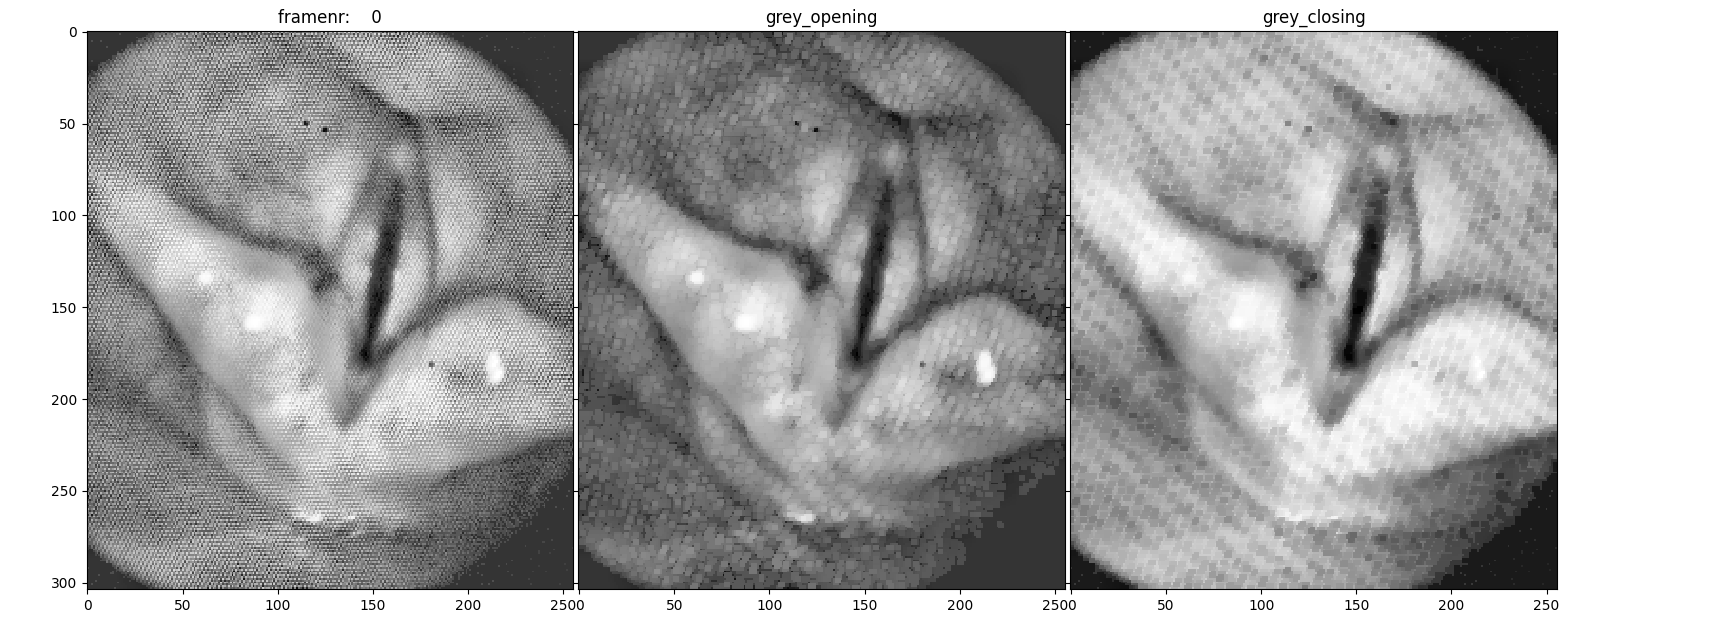

interactive(children=(IntSlider(value=0, description='Frame', layout=Layout(width='99%'), max=5999), Output())…

In [644] used 5.6914 MiB RAM in 0.31s, peaked 6.35 MiB above current, total RAM usage 6663.84 MiB


In [644]:
try:
    [ax.clear() for a in ax]
    fig.clear()
    plt.close(fig = fig)
    del ax
    del fig
except:
    pass

fig, ax = plt.subplots(ncols = 3, figsize = (17.3, 6.2), sharex = True, sharey = True)
fig.canvas.header_visible = False

plt.subplots_adjust(left = 0.05, bottom = 0.05, top = 0.95, hspace = 0.01, wspace = 0.01)

im1 = ax[0].imshow((o[0, :, :]), cmap = plt.cm.gray, aspect = 'auto', interpolation = 'none')
im1title = ax[0].set_title('framenr: %4d' % 0)

im2 = ax[1].imshow(ndimage.grey_opening(o[0, :, :], size = (3, 3)), cmap = plt.cm.gray, aspect = 'auto', interpolation = 'none')
im2title = ax[1].set_title('grey_opening')

im3 = ax[2].imshow(ndimage.grey_closing(o[0, :, :], size = (3, 3)), cmap = plt.cm.gray, aspect = 'auto', interpolation = 'none')
im3title = ax[2].set_title('grey_closing')

# im4 = ax[3].imshow(ndimage.morphological_gradient(o[0, :, :], size = (3, 3)), cmap = plt.cm.gray, aspect = 'auto', interpolation = 'none')
# im4title = ax[3].set_title('morphological_gradient')

# kymoline
xdata = []
ydata = []

# kymoline, = ax[0].plot(xdata, ydata, 'gx-', markersize = 10, linewidth = 2, zorder = 10, visible = True)
kymolinesG = [a.plot(xdata, ydata, 'gx-', markersize = 10, linewidth = 2, zorder = 10, visible = True)[0] for a in ax]
kymolinesB = [a.plot(xdata, ydata, 'bx-', markersize = 10, linewidth = 2, zorder = 10, visible = True)[0] for a in ax]

if 0:
    cursor1 = Cursor(ax1, horizOn = True, vertOn = True, useblit = True, color = 'red', linewidth = 1)
    cursor2 = Cursor(ax2, horizOn = True, vertOn = True, useblit = True, color = 'red', linewidth = 1)
    cursor3 = Cursor(ax3, horizOn = True, vertOn = True, useblit = True, color = 'red', linewidth = 1)

cursor = MultiCursor(fig.canvas, (ax[0], ax[1], ax[2]), color = 'red', lw = 1, horizOn = True, vertOn = True, useblit = True)

fig.canvas.draw_idle()

def onclick(event):
    if fig.canvas.widgetlock.locked():
        return
        
    if event.inaxes in ax:
        xdata.append(event.xdata)
        ydata.append(event.ydata)
        
        [k.set_xdata(xdata[-4:-2]) for k in kymolinesG]
        [k.set_ydata(ydata[-4:-2]) for k in kymolinesG]
        [k.set_xdata(xdata[-2:]) for k in kymolinesB]
        [k.set_ydata(ydata[-2:]) for k in kymolinesB]
        
    fig.canvas.draw_idle()

try:
    fig.canvas.mpl_disconnect(ka)
except:
    pass
ka = fig.canvas.mpl_connect('button_press_event', onclick)
        
def show_frame(framenr = 0):
    global o
    
    im1.set_data((o[framenr, :, :]))
    im1title.set_text('framenr: %4d' % framenr)
    
    im2.set_data(ndimage.grey_opening(o[framenr, :, :], size = (3, 3)))
    im3.set_data(ndimage.grey_closing(o[framenr, :, :], size = (3, 3)))
    # im4.set_data((ndimage.morphological_gradient(o[framenr, :, :], size = (3, 3))))
    
    fig.canvas.draw_idle()

framenrSlider = IntSlider(max = len(o) - 1, description = 'Frame', continuous_update = True, layout = Layout(width = '99%'))

w = interactive(show_frame, 
                framenr = framenrSlider)

display(fig.canvas)
display(w)


In [511]:
fig.get_size_inches

------> fig.get_size_inches()
------> fig.get_size_inches()


array([17.28,  6.17])

In [511] used 3.9492 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 2627.09 MiB


In [414]:
import matplotlib.animation as animation

In [414] used 0.0039 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 2207.24 MiB


In [512]:
def animate(framenr):
    if 0:
        im.set_data(o[framenr, :, :])
        imtitle.set_text('framenr: %4d' % framenr)

        return im, imtitle
    
    framenrSlider.value = framenr
    return framenrSlider,

In [512] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 2627.09 MiB


In [513]:
anim = animation.FuncAnimation(fig, animate, frames = range(1100, 1400), interval = 100, blit = True, cache_frame_data = True)

In [513] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 2627.09 MiB


In [514]:
anim.pause()

del anim
gc.collect()

6397

In [514] used -1.6250 MiB RAM in 0.64s, peaked 2.37 MiB above current, total RAM usage 2625.47 MiB


In [645]:
kymotopG = int(np.rint(ydata[-4]))
kymobottomG = int(np.rint(ydata[-3]))

kymolineG = kymobottomG

kymoleftG = int(np.rint(xdata[-4]))
kymorightG = int(np.rint(xdata[-3]))
##################################################
kymotopB = int(np.rint(ydata[-2]))
kymobottomB = int(np.rint(ydata[-1]))

kymolineB = kymobottomB

kymoleftB = int(np.rint(xdata[-2]))
kymorightB = int(np.rint(xdata[-1]))

In [645] used 3.5469 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 6667.39 MiB


In [646]:
def getkymo(movie, kymotop, kymobottom, kymoleft, kymoright):
    columns = np.linspace(kymoright, kymoleft, num = kymoright - kymoleft + 1).astype(int)
    
    rows = np.rint(np.linspace(kymobottom, kymotop, num = kymoright - kymoleft + 1)).astype(int)

    kymo = movie[:, rows, columns]
    return kymo

kymo1 = getkymo(o, kymotopG, kymobottomG, kymoleftG, kymorightG)
kymo2 = getkymo(o, kymotopB, kymobottomB, kymoleftB, kymorightB)

In [646] used -0.5781 MiB RAM in 0.13s, peaked 0.58 MiB above current, total RAM usage 6666.81 MiB


kymo1 = o[:, int(np.rint(ydata[-2])), kymoright:kymoleft:-1]

kymo2 = o[:, kymoline, kymoright:kymoleft:-1]

In [647]:
kymo = np.hstack((kymo1, kymo2))
print(kymo.shape)

(6000, 87)
In [647] used -0.5781 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 6666.23 MiB


In [648]:
pwd

'C:\\Users\\m142519\\Desktop\\JN_SOVTE\\JN_Experiment01_Cross\\HSV_20230818_133111'

In [648] used 0.0000 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 6666.23 MiB


In [649]:
[hsvaudio, hsvtrigger], fsaudio = librosa.load('../hsv.WAV', sr = None, mono = False)

In [649] used 34.9375 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 6701.17 MiB


In [650]:
starttimesamples = starttimems * fsaudio // 1000
endtimesamples = endtimems * fsaudio // 1000

audiokymo = hsvaudio[starttimesamples - fsaudio//2 * 0 : endtimesamples + fsaudio//2 * 0]

In [650] used -34.9375 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 6666.23 MiB


In [651]:
f0max = 600 # maximum peak frequency in Hz

[peakloc, mad] = find_peaks_fast(audiokymo, neighbors = fsaudio // f0max)

In [651] used 0.0078 MiB RAM in 0.14s, peaked 0.00 MiB above current, total RAM usage 6666.24 MiB


In [652]:
plt.close(fig = figk)
del figk
gc.collect()

30

In [652] used 0.0000 MiB RAM in 0.73s, peaked 0.00 MiB above current, total RAM usage 6666.24 MiB


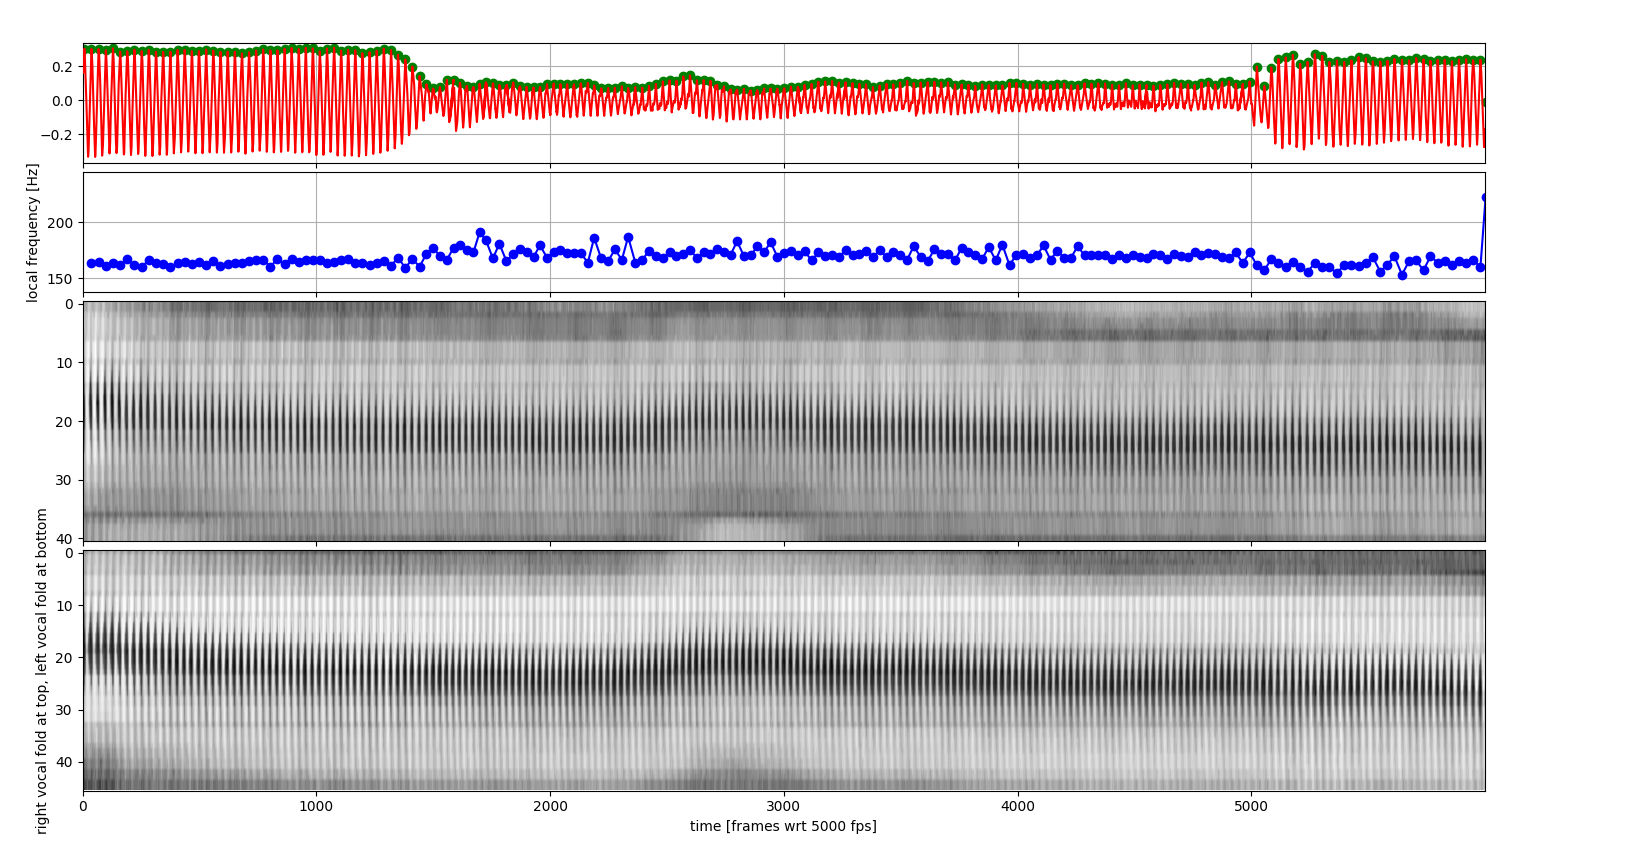

In [653] used 14.1055 MiB RAM in 0.51s, peaked 2.20 MiB above current, total RAM usage 6680.35 MiB


In [653]:
try:
    [a.clear() for a in axk]
    axaudio.clear()
    del axk, axaudio
    figk.clear()
    plt.close(fig = figk)
    del figk
    del cursoraudio
except:
    pass

figk, axk = plt.subplots(nrows = 4, figsize = (16.5, 8.5), height_ratios = [1, 1, 2, 2], sharex = True, sharey = False)
figk.canvas.header_visible = False
plt.subplots_adjust(left = 0.05, bottom = 0.07, top = 0.95, wspace = 0.05, hspace = 0.05)

# axaudio = axk.twinx()
axaudio = axk[0]

audioframetime = np.arange(0, endtimesamples - starttimesamples) / fsaudio * fps

audiodelayfromglottis = 0.17 / 344 * fps # in highspeed frames

audiokymotime = audioframetime + audiodelayfromglottis

axaudio.plot(audiokymotime, audiokymo, 'r-', zorder = 10, alpha = 1.0)

axaudio.plot(audiokymotime[peakloc], audiokymo[peakloc], 'go')
axaudio.grid(visible = True, which = 'both')

axaudio.set_ylim(bottom = audiokymo.min() * 1.1, top = audiokymo.max() * 1.1) # minimum should be negative

axfrequ = axk[1]
localfrequ = fsaudio / np.diff(peakloc)
axfrequ.plot(audiokymotime[peakloc[1:]], localfrequ, 'bo-')
axfrequ.set_ylim(bottom = localfrequ.min() * 0.9, top = localfrequ.max() * 1.1)
axfrequ.grid(visible = True, which = 'both')

axfrequ.set_ylabel('local frequency [Hz]')

# imk = axk.imshow(ndimage.grey_opening(kymo.T, size = (3, 3)), cmap = plt.cm.gray, aspect = 'auto')
imk1 = axk[2].imshow(ndimage.grey_opening(kymo1.T, size = (3, 3)), cmap = plt.cm.gray, aspect = 'auto')
imk2 = axk[3].imshow(ndimage.grey_opening(kymo2.T, size = (3, 3)), cmap = plt.cm.gray, aspect = 'auto')

axk[3].set_xlabel(f'time [frames wrt {fps} fps]')
axk[3].set_ylabel('right vocal fold at top, left vocal fold at bottom')

# axk.plot(coords[:, 1], coords[:, 0], color='cyan', marker='x', linestyle='None', markersize=6)

# plt.sca(axk)
# figk.sca(axk)

# cursoraudio = Cursor(axaudio, horizOn = True, vertOn = True, useblit = True, color = 'green', linewidth = 1, zorder = 10)

cursoraudio = MultiCursor(figk.canvas, (axk[0], axk[1], axk[2], axk[3]), useblit = True, horizOn = True, vertOn = True, color = 'red', linewidth = 1)

figk.canvas.draw_idle()

display(figk.canvas)

%reset array

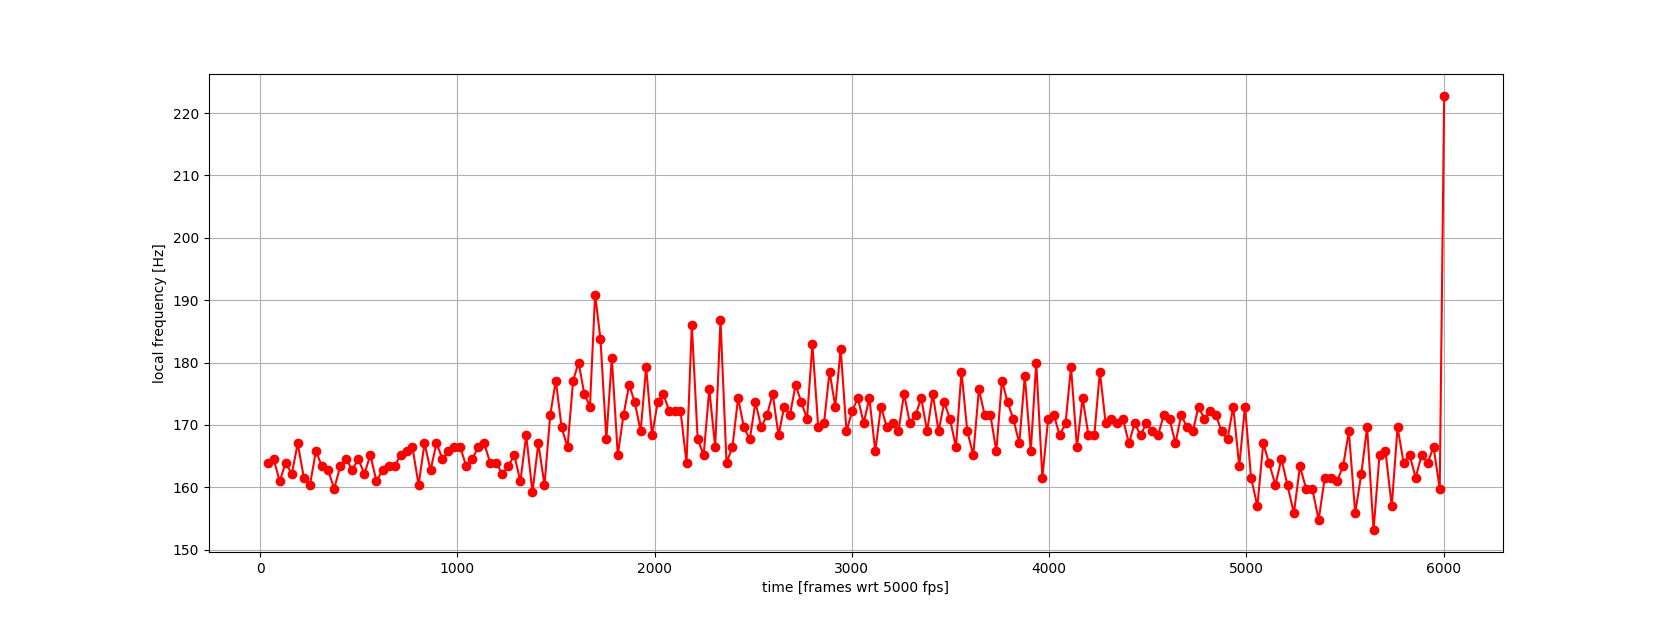

In [654] used 4.8320 MiB RAM in 0.21s, peaked 0.00 MiB above current, total RAM usage 6685.18 MiB


In [654]:
figf.clear()
axf.clear()

del figf, axf

figf, axf = plt.subplots(num = 4, figsize = (16.7, 6.2))
figf.canvas.header_visible = False

axf.plot(audiokymotime[peakloc[1:]], fsaudio / np.diff(peakloc), 'ro-')

# axf.plot(audiokymotime, audiokymo, 'g.-')

axf.grid(visible = True, which = 'both')

axf.set_xlabel(f'time [frames wrt {fps} fps]')
axf.set_ylabel('local frequency [Hz]')

figf.canvas.draw_idle()

display(figf.canvas)

In [224]:
from skimage import feature, filters, morphology

In [224] used 0.0547 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 5508.16 MiB


In [ ]:
morphology.black_tophat()

In [ ]:
feature.peak_local_max()

In [146]:
coords = feature.corner_peaks(feature.corner_harris(kymo.T, sigma = 0.5), min_distance = 20)

In [162]:
from skimage import filters

In [164]:
elevation_map = filters.sobel(kymo.T)

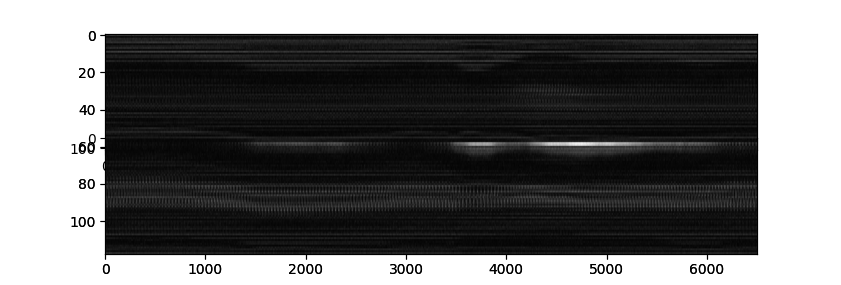

In [167]:
del fige, axe

fige, axe = plt.subplots(num = 3, figsize = (4, 3))

axe.imshow(elevation_map, cmap = plt.cm.gray, aspect = 'auto')

display(fige.canvas)

In [239]:
def find_peaks_fast(xin, neighbors = 1):
    """
    find_peaks_fast(xin, neighbors = 1)
    
    neighbors: search for maxima outside of the immediate neighborhood of total size 2*neighbors
    i.e. minimum period corresponds to neighbors * samplingrate
    
    return [peakloc, mad]
    """
    
    if isinstance(xin, list):
        x = np.array(xin)
    else:
        x = xin

    Nx = x.size

    if neighbors == 0:
        neighbors = 1

    # always an odd number larger or equal to 3
    Nsearch = 2 * neighbors + 1

    if Nsearch > Nx:
        raise ValueError("searchwindow Nsearch is larger than number of samples: reduce neighbors")

    # 1. find maximum
    # 2. is maximum at center? 
    # if no, center searchwindow at maximum, 
    #         search max
    #         test again for center
    # if yes: move search window so that it just does not include the found maximum
    # make sure that the search window does not go backwards and gets stuck on the first-found maximum

    def MAD(samples):
        """
        calculate the median absolute deviation: median(abs(x - median(x)))
        """
        return np.median(np.abs(samples - np.median(samples)))

    def borders(center, neighbors = neighbors):
        left = center - neighbors
        right = center + neighbors + 1
        return left, right

    center = neighbors
    left, right = borders(center)

    searchdata = x[left:right]
    searchdata_zeros = np.zeros_like(searchdata)

    peakloc = []
    mad = []

    # initial step to find first maximum
    while True:
        if left < 0:
            if right < 0:
                print("left: ", left)
                print("center: ", center)
                print("right: ", right)
            searchdata = searchdata_zeros[:]
            searchdata[-left : ] = x[0:right]
            minx = np.min( x[0:right] )
            searchdata[ : -left] = minx
            del minx
        else:
            searchdata = x[left:right]

        maxind = np.argmax(searchdata)
        # maximum at center?
        if maxind == neighbors:
            # found one local maximum: stop this loop
            peakloc.append(center)
            mad.append(MAD(searchdata))
            break
        else:
            # re-center search window and test again
            # work in absolut sample indices, not just relative search window indices
            center = left + maxind
            left, right = borders(center)

    # next step to find more maxima to the RIGHT of the first-found maximum
    #
    # move search window and repeat local search (are we doing mean-shift)
    center = right
    left, right = borders(center)

    # to move forward: discard maximum found at border which is just next to the previously found maximum

    while True:
        if center >= Nx:
            break

        if right > Nx:
            searchdata = searchdata_zeros[:]
            searchdata[0 : Nx - left] = x[left:Nx]
            minx = np.min( x[left:Nx] )
            searchdata[Nx - left : ] = minx
            del minx
        else:
            searchdata = x[left:right]

        maxind = np.argmax(searchdata)

        # 1. is the maximum in the center: done
        # 2. is the maximum to the right of the center: move the center there
        # 3. none of the above: move the entire search window over: center at previous right side

        if maxind == neighbors:
            peakloc.append(center)
            # print "peakloc: ", peakloc
            mad.append(MAD(searchdata))

            # done: move the search window over: center is at previous right side
            center = right
            left, right = borders(center)
            continue
        # this case is not necessary because the next case controls the behavior
        # elif maxind == 0:
        #     # discard border maxima: move forward by half the search window
        #     center = right
        #     left, right = borders(center)

        if maxind > neighbors:
            # re-center search window and test again
            center = left + maxind
            left, right = borders(center)
        else:
            # maxind < neighbors: no candidates for maxima here, move on
            center += 1
            left, right = borders(center)

    return [peakloc, mad]

In [239] used -0.0039 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 5547.41 MiB


In [ ]:
def find_peaks(xin, neighbors):
    """
    find_peaks(xin, neighbors)
    """
    # peaks = []

    if isinstance(xin, list):
        x = np.array(xin)
    else:
        x = xin

    nxin = x.size

    # can we know this better based on the max frequency to be detected???
    Ntmp = 10000

    tmp = np.zeros(Ntmp, dtype = np.int64)
    pcount = 0

    assert 2 * neighbors + 1 <= nxin

    if nxin == 1:
        # peaks.append(0)
        tmp[pcount] = 0
        peaks = tmp[pcount]
        return peaks
    elif nxin == 2:
        if x[0] > x[1]:
            # peaks.append(0)
            tmp[pcount] = 0
        else:
            # peaks.append(1)
            tmp[pcount] = 1
        
        peaks = tmp[pcount]
        return peaks

    # pad at the ends of the time series
    minx = x.min()

    padstart = minx * np.ones(neighbors)
    x = np.append(padstart, x)
    
    padend = minx * np.ones(neighbors - 1)
    x = np.append(x, padend)
    
    nx = x.size

    # see mplab.py and the indexing in the spectral_helper function for
    # the sliced time series for the spectrogram
    Nwindow = 2 * neighbors + 1
    step = 1
    ind = np.arange(0, nx - Nwindow + 1, step)
    n = ind.size
    
    # check whether the central point is the maximum
    for i in np.arange(n):
        xsel = x[ind[i]: ind[i] + Nwindow]
        
        # don't need to check in Nwindow after a local maximum was found
        # not implemented yet!
        delta_i = xsel.argmax()

        if xsel.argmax() == neighbors:
            tmp[pcount] = ind[i] + neighbors
            pcount += 1
            delta_i = 1

        new_i = ind[i] + delta_i

        # enlarge the array that holds the extrema location
        if pcount == tmp.size:
            tmp = np.resize(tmp, (pcount + Ntmp,))
            tmp[pcount:] = 0

    # subtract the amount of padded data points at the start
    peaks = tmp[:pcount] - neighbors
    
    if peaks[-1] == (nxin - 1):
        peaks = np.delete(peaks, -1)
        
    if peaks[0] == 0:
        peaks = np.delete(peaks, 0)

    # print "peaks[-1] = ", peaks[-1]
    # print "nxin = ", nxin
    
    return peaks

#######################################

if __name__ == '__main__':
    Nperiods = 20
    period = 3

    x = np.arange(Nperiods * period) % period

    peaks = find_peaks_fast(x, period - 1)

    assert len(peaks) == Nperiod
    pass

# %timeit find_peaks(x, 2)
# 1000 loops, best of 3: 233 us per loop

# %timeit find_peaks_fast(x, 2)
# 10000 loops, best of 3: 38.1 us per loop